In [ ]:
import csv
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
vocab_size=1000         # num of words
embedding_dim=16        # word embedding dimensions
max_length=120          # max length of sentence
trunc_type='post'
padding_type='post'
ovv_tok='<OOV>'         # unknown words clsdd OVV
training_portion=0.8    # training data set ratio

In [ ]:
sentences=[]
labels =[]

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_word=stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
with open('/content/bbc-text (1).csv','r') as csvfile:
    reader=csv.reader(csvfile,delimiter=',')
    for row in reader:
        if row[0]!='category':
            labels.append(row[0])
            sentence=row[1]
            for word in stop_word:
                token=" "+word+" "
                sentence=sentence.replace(token," ")
            sentences.append(sentence)

        else:
            continue





In [ ]:
print(len(labels))
print(len(sentences))
print(sentences[0])
print(labels[0])

2225
2225
tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies impact one favourite pastimes. us leading trend  programmes content delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us tivo uk sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take europe lack high-definition programming. people forward wind adverts  also forget abiding network channel schedules  putting together a-la-carte entertainment. us networks cable satellite 

In [ ]:
train_size=int(len(sentences)*training_portion)
y_train=labels[:train_size]
X_train=sentences[:train_size]

y_test=labels[train_size:]
X_test=sentences[train_size:]
print(f'training data size = {len(X_train)}')

print(f'training labels size = {len(y_train)}')

print(f'test data size = {len(X_test)}')

print(f'test labels size = {len(y_test)}')

training data size = 1780
training labels size = 1780
test data size = 445
test labels size = 445


In [ ]:
tokenizer=Tokenizer(num_words=vocab_size,oov_token=ovv_tok)
tokenizer.fit_on_texts(X_train)
word_index=tokenizer.word_index

In [ ]:
X_train = tokenizer.texts_to_sequences(X_train)
train_padded= pad_sequences(X_train,padding=padding_type,maxlen=max_length)


In [ ]:
X_test = tokenizer.texts_to_sequences(X_test)
test_padded= pad_sequences(X_test,padding=padding_type,maxlen=max_length)


In [ ]:
import numpy as np

label_tokenizer=Tokenizer()
label_tokenizer.fit_on_texts(labels)

y_training=np.array(label_tokenizer.texts_to_sequences(y_train))

y_testing=np.array(label_tokenizer.texts_to_sequences(y_test))

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
    tf.keras.layers.GlobalMaxPool1D(),
    tf.keras.layers.Dense(24,activation='relu'),
    tf.keras.layers.Dense(6,activation='softmax')
])
model.compile(loss=tf.losses.sparse_categorical_crossentropy,optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 150       
Total params: 16,558
Trainable params: 16,558
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs=30
history=model.fit(train_padded,y_training,epochs=num_epochs,validation_data=(test_padded,y_testing))

Epoch 1/30
56/56 [==============================] - 1s 5ms/step - loss: 1.7704 - accuracy: 0.2303 - val_loss: 1.7418 - val_accuracy: 0.2270
Epoch 2/30
56/56 [==============================] - 0s 2ms/step - loss: 1.6869 - accuracy: 0.2371 - val_loss: 1.6312 - val_accuracy: 0.2607
Epoch 3/30
56/56 [==============================] - 0s 2ms/step - loss: 1.5306 - accuracy: 0.3685 - val_loss: 1.4509 - val_accuracy: 0.4584
Epoch 4/30
56/56 [==============================] - 0s 3ms/step - loss: 1.2917 - accuracy: 0.5140 - val_loss: 1.1986 - val_accuracy: 0.5573
Epoch 5/30
56/56 [==============================] - 0s 3ms/step - loss: 1.0150 - accuracy: 0.6343 - val_loss: 0.9502 - val_accuracy: 0.6989
Epoch 6/30
56/56 [==============================] - 0s 2ms/step - loss: 0.7677 - accuracy: 0.8028 - val_loss: 0.7472 - val_accuracy: 0.8135
Epoch 7/30
56/56 [==============================] - 0s 3ms/step - loss: 0.5776 - accuracy: 0.8820 - val_loss: 0.6035 - val_accuracy: 0.8494
Epoch 8/30
56/56 [==

In [ ]:
import matplotlib.pyplot as plt
def plot_graphs(history,string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

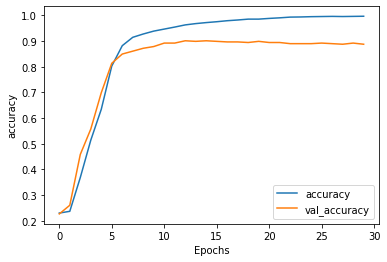

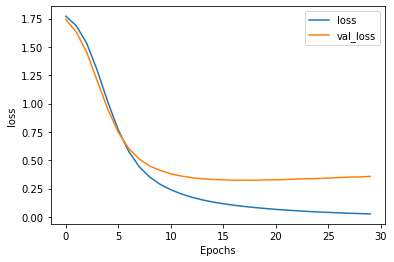

In [ ]:
plot_graphs(history,'accuracy')
plot_graphs(history,'loss')